In [1]:
import mysql.connector
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np
from decimal import Decimal
from matplotlib.ticker import AutoMinorLocator, FuncFormatter,MultipleLocator

# 1. Conectar ao banco de dados MySQL
con = mysql.connector.connect(
    host="localhost",        
    user="constructal_automate",     
    password="constructal_design_2024",    
    database="constructal_automate_results"
)

cur = con.cursor()

query = f'''
SELECT sp.id, sp.k, epb.w_max FROM constructal_automate_results.cbeb_elastoplasticbuckling as epb
INNER JOIN constructal_automate_results.cbeb_stiffenedplateanalysis as spa on epb.stiffened_plate_analysis_id=spa.id
INNER JOIN constructal_automate_results.csg_stiffenedplate as sp on spa.stiffened_plate_id=sp.id 
WHERE 
spa.buckling_load_type_id = 2 and
epb.id not between 259 and 266;
'''
cur.execute(query)
dados_flambagem = cur.fetchall()

# Fechar a conexão com o banco de dados
con.close()

globals()['caso_ref_2a'] = dados_flambagem[0]

tensao_placa_ref = dados_flambagem[0][2]
print('Deslocamento z da Placa de Referência: ', tensao_placa_ref)

start_index = 1
end_index = 9

# Laço para criar as variáveis "caso_X_Y_2a"
for N_ls in range(2, 6):      # X varia de 2 a 5
    for N_ts in range(2, 6):  # Y varia de 2 a 5
        nome = f"caso_{N_ls}_{N_ts}_2a"
        globals()[nome] = dados_flambagem[start_index:end_index]
        array_atual = globals()[nome]

        array_atual = [(linha[0], linha[1], (linha[2]/tensao_placa_ref)) for linha in array_atual]

        globals()[nome] = array_atual

        print('\n')
        print('------------------------------------------------------------')
        print('N_ls = ', N_ls, '; N_ts = ', N_ts)
        print('------------------------------------------------------------')
        print(array_atual)
        
        start_index += 8
        end_index += 8

Deslocamento z da Placa de Referência:  38.0533


------------------------------------------------------------
N_ls =  2 ; N_ts =  2
------------------------------------------------------------
[(2, Decimal('56.200'), Decimal('0.004133675660192414324119064575')), (3, Decimal('14.100'), Decimal('0.09469086780909934223838668394')), (4, Decimal('6.333'), Decimal('0.08644979541853137572825484255')), (5, Decimal('3.550'), Decimal('0.08267088531086660026857066273')), (6, Decimal('2.280'), Decimal('0.08942982605976354218950787448')), (7, Decimal('1.600'), Decimal('0.2005213739675665448200287491')), (8, Decimal('1.171'), Decimal('0.2580985091963114894109052303')), (9, Decimal('0.900'), Decimal('0.2572523276562085285638827644'))]


------------------------------------------------------------
N_ls =  2 ; N_ts =  3
------------------------------------------------------------
[(10, Decimal('42.200'), Decimal('0.008792929916722071410363884341')), (11, Decimal('10.600'), Decimal('0.09568946714214010

In [2]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np
from decimal import Decimal
from matplotlib.ticker import AutoMinorLocator, FuncFormatter,MultipleLocator, FormatStrFormatter
import matplotlib.ticker as ticker
import locale
locale.setlocale(locale.LC_NUMERIC, 'pt_BR.UTF-8')

plt.rcParams['axes.formatter.use_locale'] = True
plt.rcParams['font.family'] = 'Lucida Sans'

min_k = 0
max_k = 60

min_sigma_u = 0
max_sigma_u = 1.25

k_data_ref = list(range(0, 61, 5))
sigma_u_2a_ns_data = [1 for _ in range(len(k_data_ref))]

def generate_constructal_design_plots(N_ls, N_ts, k_data, sigma_u_2a_sp_data):   
    fig, ax = plt.subplots(figsize=(8, 6))

    formatter = ticker.FuncFormatter(lambda x, _: f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
    ax.yaxis.set_major_formatter(formatter)
    
    # ax.plot(k_data, sigma_u_2a_sp_data, '-o', color='#486858', lw=2, markersize=4, label=rf'$NUS_{{2A}} - P({N_ls},{N_ts})$')
    ax.plot(k_data, sigma_u_2a_sp_data, '-o', color='#0000ff', lw=2, markersize=4, label=rf'$Com\;Enrijecedores\;(N_{{ls}} = {N_ls}, N_{{ts}} = {N_ts})$')
    # ax.plot(k_data, sigma_u_2a_ns_data, color='#eb8e27', lw=2, linestyle='--', marker='', label=rf'$NUS_{{2A,ref}}$')
    # ax.plot(k_data_ref, sigma_u_2a_ns_data, color='#eb8e27', lw=2, linestyle='--', marker='', label=rf'$NMD_{{2A,ref}}$')
    ax.plot(k_data_ref, sigma_u_2a_ns_data, color='#eb8e27', lw=2, linestyle='--', marker='', label=rf'Sem Enrijecedores')
    
    ax.set_xlabel(rf'$h_{{s}}/t_{{s}}$', fontsize=18)
    ax.set_ylabel(rf'$NMD_{{2A}}$', fontsize=18)
    ax.legend(loc='upper right', fontsize=14)
    
    ax.grid(True, which='major', linestyle='-', linewidth=0.25, color='gray')  # Grade principal
    ax.grid(True, which='minor', linestyle='--', linewidth=0.25, color='lightgray')  # Grade secundária
    
    
    ax.set_xlim([min_k, max_k])
    ax.set_ylim([min_sigma_u, max_sigma_u])
    
    # Configurar os locators de forma explícita
    ax.xaxis.set_major_locator(MultipleLocator(10))  # Ticks principais no eixo X
    ax.xaxis.set_minor_locator(MultipleLocator(2))   # Ticks menores no eixo X
    
    ax.yaxis.set_major_locator(MultipleLocator(0.25))   # Ticks principais no eixo Y
    ax.yaxis.set_minor_locator(MultipleLocator(0.05)) # Ticks menores no eixo Y

    ax.tick_params(axis='both', labelsize=18)
    
    # plt.savefig(f'graficos_design_construtal/grafico-L{N_ls}-T{N_ts}-phi-0.3.png')
    plt.savefig(f'graficos_dc_nmd/grafico_L{N_ls}_T{N_ts}_phi_0.3.png')
    
    # Exibir o gráfico
    # plt.show()

N_ls = 2 , N_ts = 2


------------------------------------------------------------
N_ls =  2 ; N_ts =  2
------------------------------------------------------------
k_data =  (Decimal('56.200'), Decimal('14.100'), Decimal('6.333'), Decimal('3.550'), Decimal('2.280'), Decimal('1.600'), Decimal('1.171'), Decimal('0.900'))
------------------------------------------------------------
sigma_u_2a_sp_data =  (Decimal('0.004133675660192414324119064575'), Decimal('0.09469086780909934223838668394'), Decimal('0.08644979541853137572825484255'), Decimal('0.08267088531086660026857066273'), Decimal('0.08942982605976354218950787448'), Decimal('0.2005213739675665448200287491'), Decimal('0.2580985091963114894109052303'), Decimal('0.2572523276562085285638827644'))
------------------------------------------------------------
N_ls = 2 , N_ts = 3


------------------------------------------------------------
N_ls =  2 ; N_ts =  3
------------------------------------------------------------
k_data =  (Decim

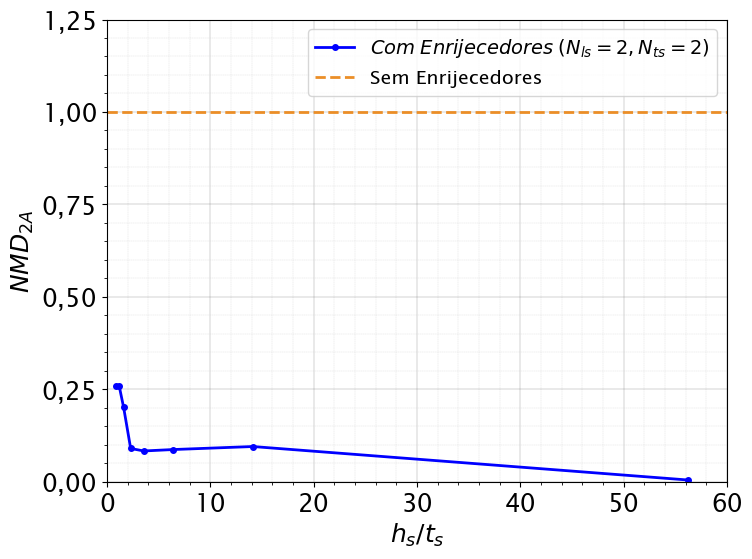

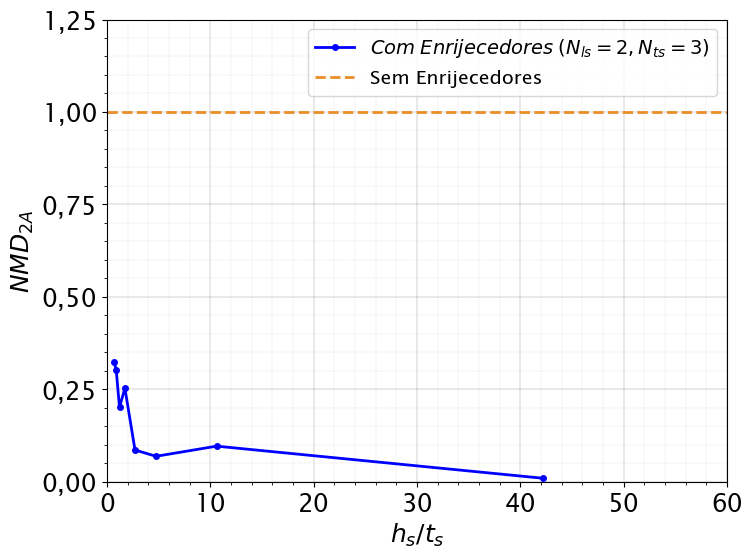

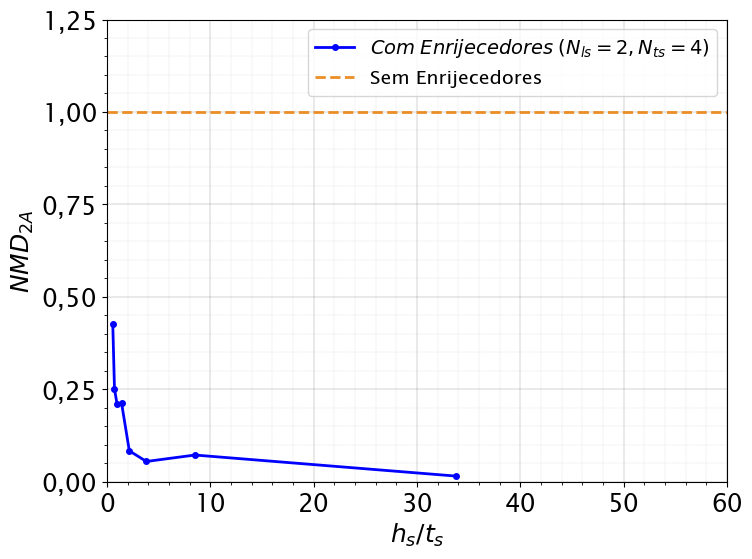

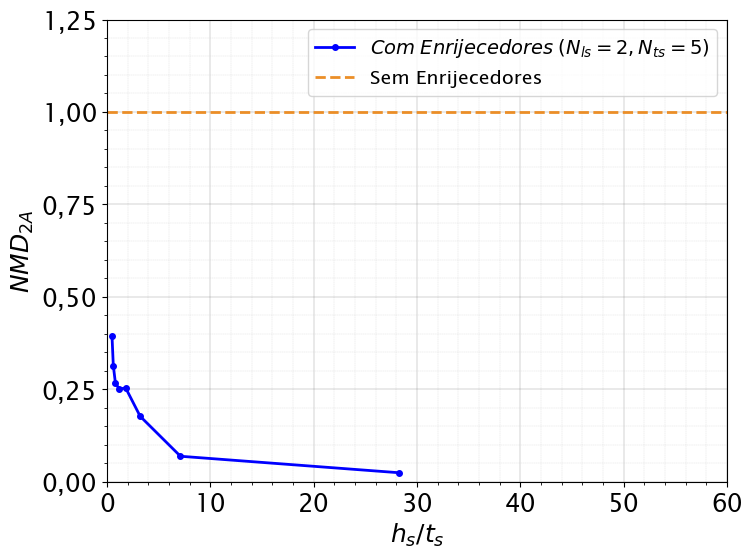

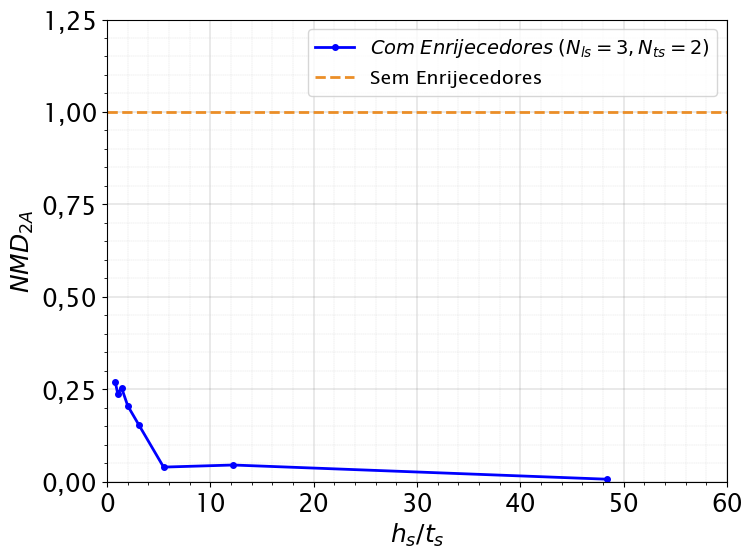

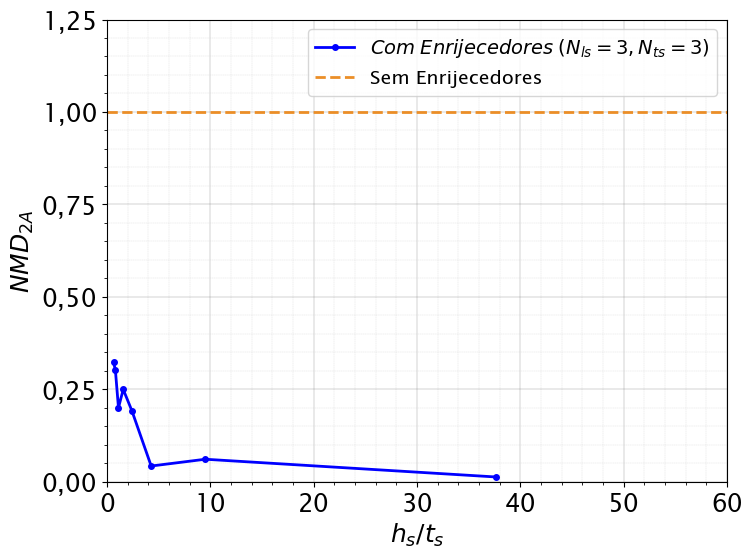

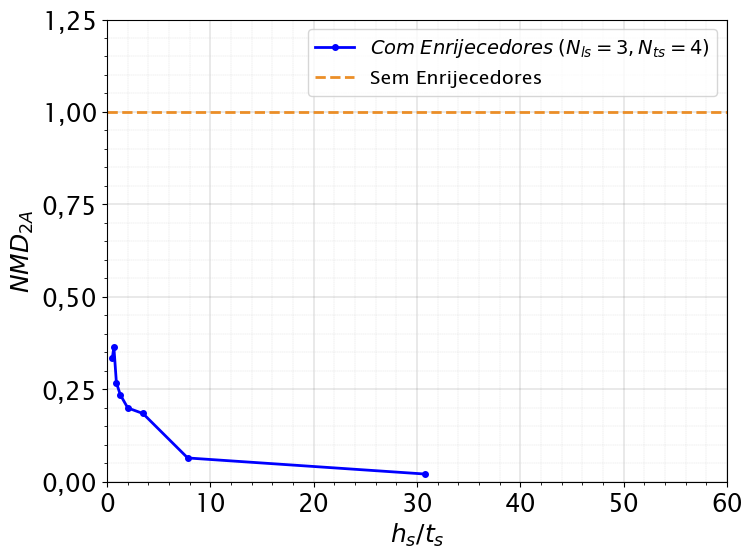

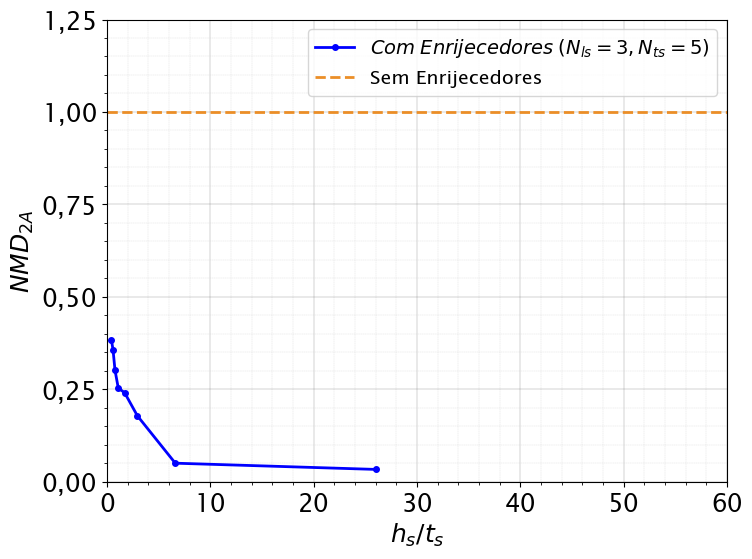

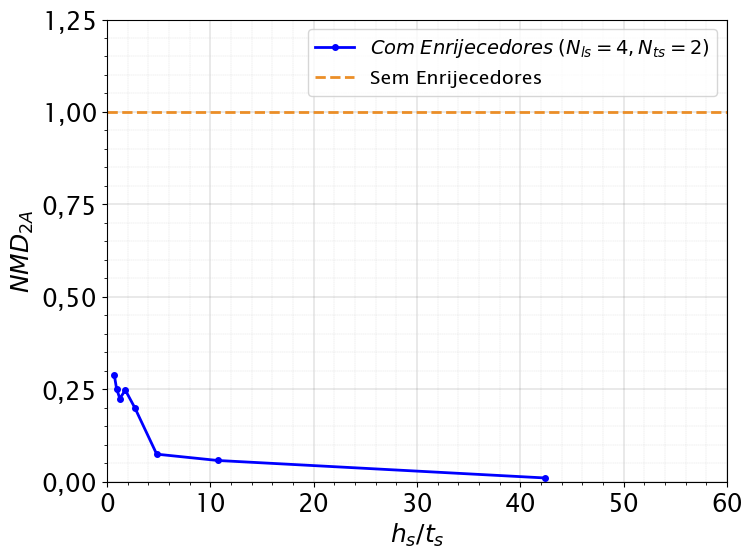

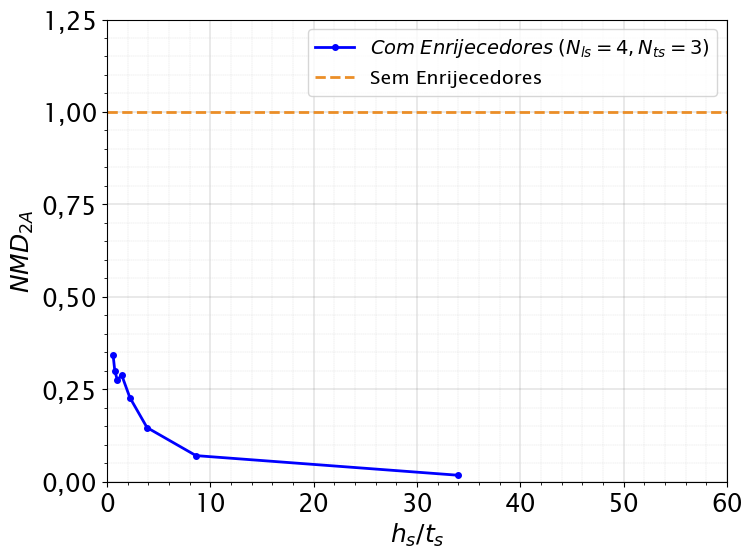

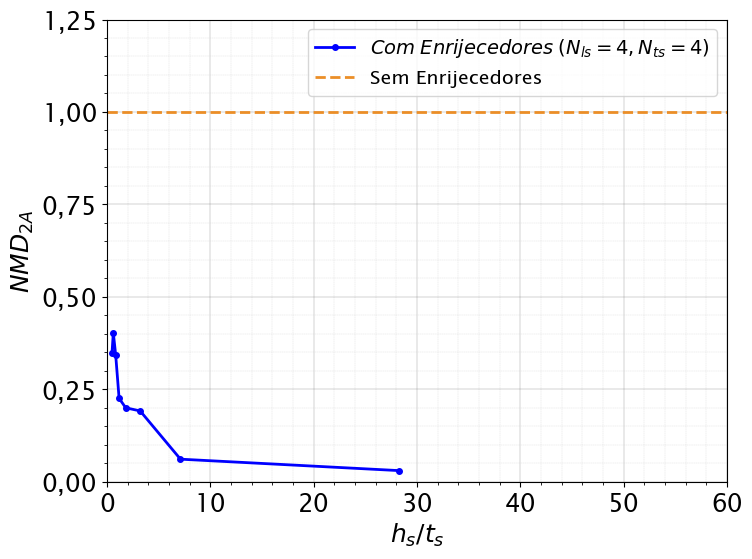

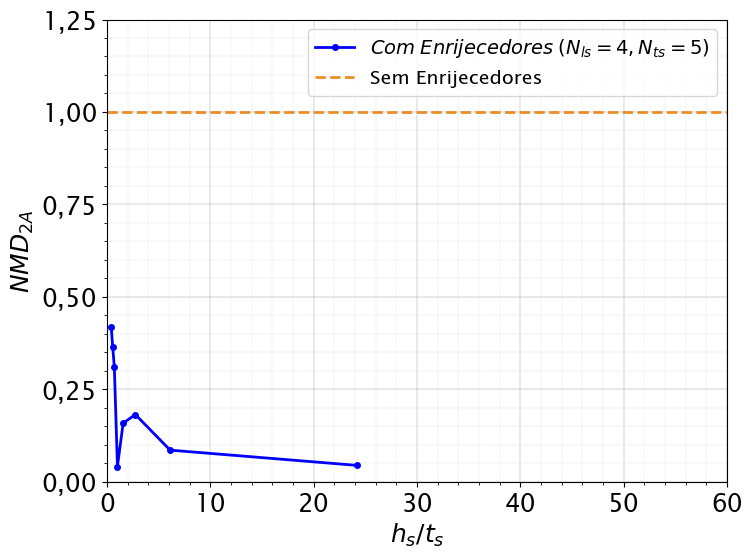

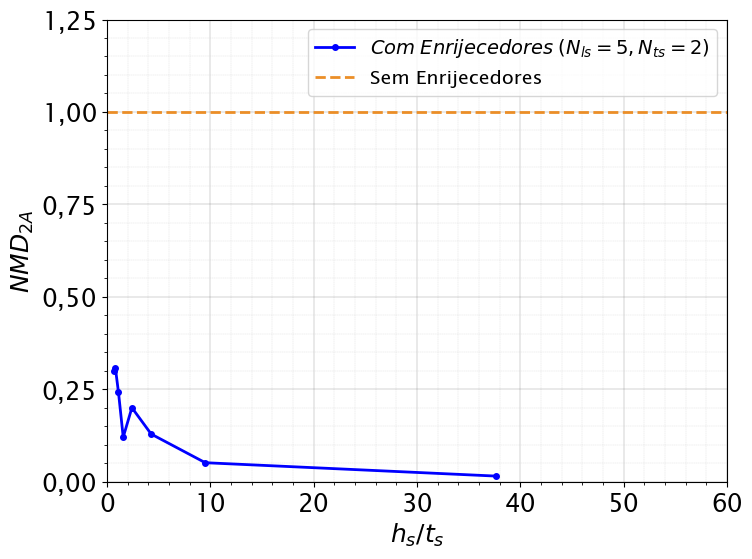

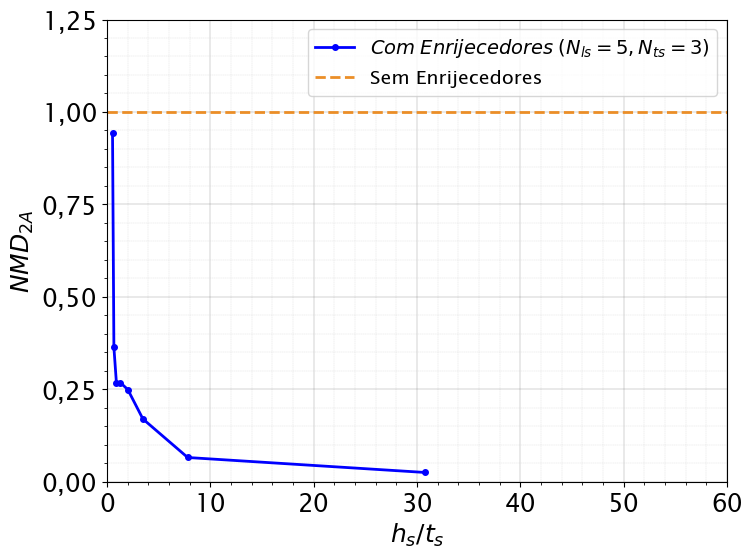

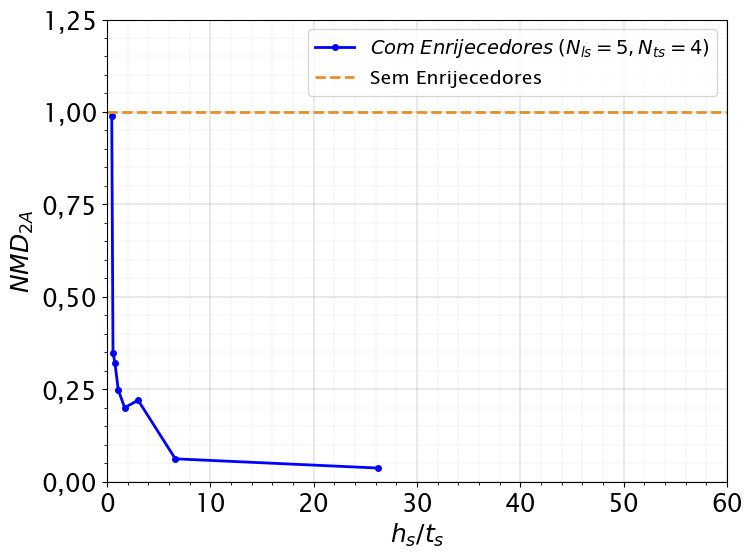

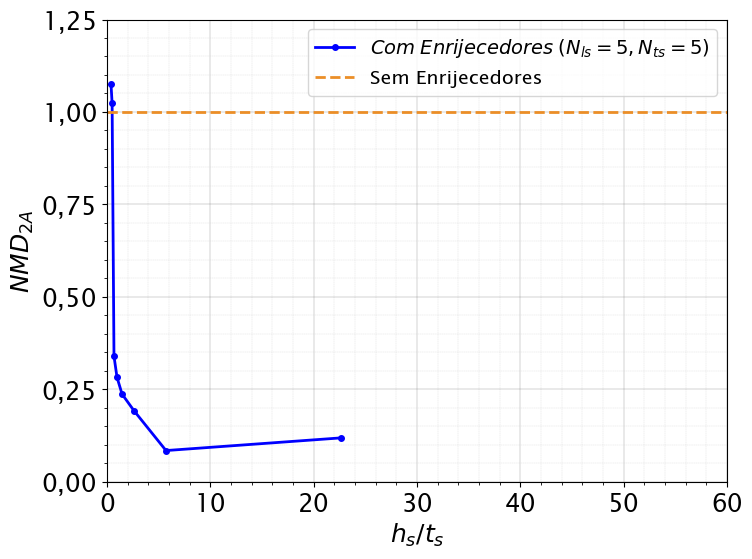

In [3]:
'''
[0] sp.id
[1] sp.k
[2] epb.sigma_u
'''

for N_ls in range(2, 6):
    for N_ts in range(2, 6):
        nome = f"caso_{N_ls}_{N_ts}_2a"
        k_data, sigma_u_2a_sp_data = zip(*[(obj[1], obj[2]) for obj in globals()[nome]])
        print(f'N_ls = {N_ls} , N_ts = {N_ts}')

        print('\n')
        print('------------------------------------------------------------')
        print('N_ls = ', N_ls, '; N_ts = ', N_ts)
        print('------------------------------------------------------------')
        print('k_data = ', k_data)
        print('------------------------------------------------------------')
        print('sigma_u_2a_sp_data = ', sigma_u_2a_sp_data)
        print('------------------------------------------------------------')
        generate_constructal_design_plots(N_ls, N_ts, k_data, sigma_u_2a_sp_data)
#print(caso_2_3_2a)
#k_usar,sigma_usar = zip(*[(obj[1], obj[2]) for obj in caso_2_3_2a])

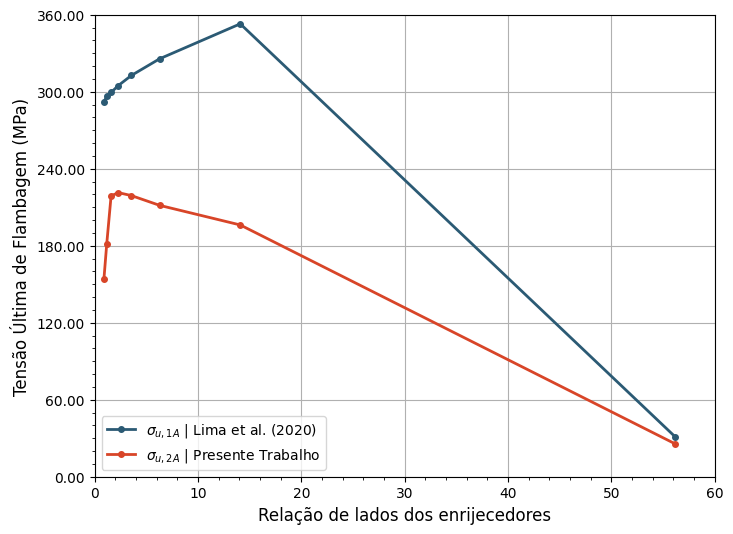

In [46]:
min_k = 0
max_k = 60

min_sigma_u = 0
max_sigma_u = 360
          
# Criar o gráfico
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(k_data, sigma_u_1a_data, '-o', color='#2b5a74', lw=2, markersize=4, label=r'$\sigma_{u,1A}$ | Lima et al. (2020)')
ax.plot(k_data, sigma_u_2a_data, '-o', color='#d84528', lw=2, markersize=4, label=r'$\sigma_{u,2A}$ | Presente Trabalho')

# Configurar rótulos dos eixos e legenda
ax.set_xlabel(r'Relação de lados dos enrijecedores', fontsize=12)
# ax.set_ylabel(r'$\sigma_{u,1A}$', fontsize=12)
ax.set_ylabel('Tensão Última de Flambagem (MPa)', fontsize=12)
ax.legend(loc='lower left')

# Adicionar a malha ao gráfico
ax.grid(True)

# Definir os limites dos eixos, se necessário
ax.set_xlim([min_k, max_k])  # Limites do eixo X
ax.set_ylim([min_sigma_u, max_sigma_u])  # Limites do eixo Y

# ax.grid(True, linestyle='--', linewidth=0.5, which='major')  # Grade principal
# ax.grid(True, linestyle=':', linewidth=0.3, which='minor')   # Grade secundária

ax.yaxis.set_major_locator(MultipleLocator(60))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(6))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Salvar o gráfico com o timestamp e valores de N_ls e N_ts no nome do arquivo
plt.savefig(f'resultados_artigo_mcsul2024/ec-comparacao-sigma-u-1a-2a.png')

# Exibir o gráfico
plt.show()

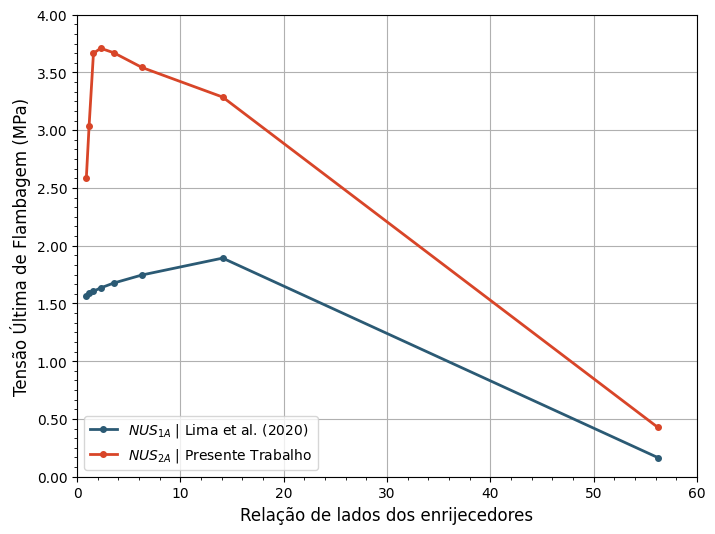

In [51]:
min_k = 0
max_k = 60

min_sigma_u = 0
max_sigma_u = 4
          
# Criar o gráfico
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(k_data, nus_1a, '-o', color='#2b5a74', lw=2, markersize=4, label=r'$NUS_{1A}$ | Lima et al. (2020)')
ax.plot(k_data, nus_2a, '-o', color='#d84528', lw=2, markersize=4, label=r'$NUS_{2A}$ | Presente Trabalho')

# Configurar rótulos dos eixos e legenda
ax.set_xlabel(r'Relação de lados dos enrijecedores', fontsize=12)
# ax.set_ylabel(r'$\sigma_{u,1A}$', fontsize=12)
ax.set_ylabel('Tensão Última de Flambagem (MPa)', fontsize=12)
ax.legend(loc='lower left')

# Adicionar a malha ao gráfico
ax.grid(True)

# Definir os limites dos eixos, se necessário
ax.set_xlim([min_k, max_k])  # Limites do eixo X
ax.set_ylim([min_sigma_u, max_sigma_u])  # Limites do eixo Y

# ax.grid(True, linestyle='--', linewidth=0.5, which='major')  # Grade principal
# ax.grid(True, linestyle=':', linewidth=0.3, which='minor')   # Grade secundária

ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(6))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Salvar o gráfico com o timestamp e valores de N_ls e N_ts no nome do arquivo
plt.savefig(f'resultados_artigo_mcsul2024/ec-comparacao-nus-1a-2a.png')

# Exibir o gráfico
plt.show()